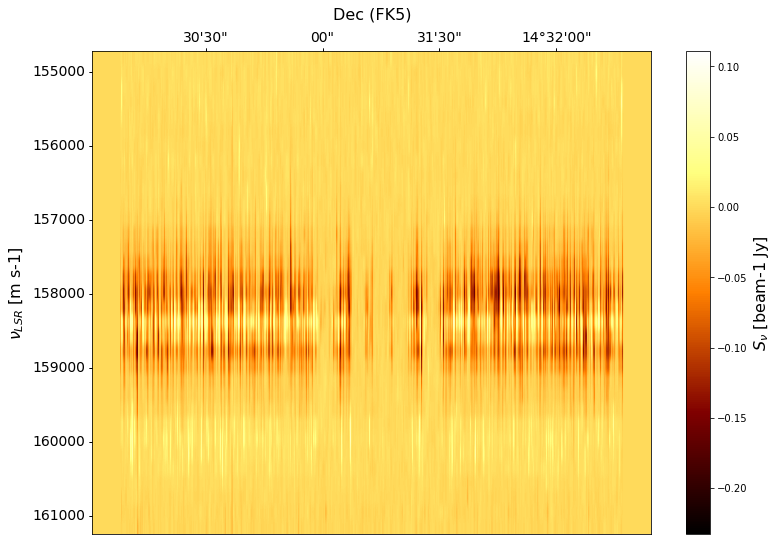

In [3]:
import sys
import warnings
sys.path.append('/orange/adamginsburg/ALMA_IMF/reduction/analysis/')

import numpy as np
import pylab as pl
from astropy import units as u
from astropy.wcs import WCS
from astropy import visualization

from spectral_cube import SpectralCube

fn = '/orange/adamginsburg/w51/vla/19A-254/derod/CASA/W51e2w_spw_9_rough_02.image.fits'
fh = SpectralCube.read(fn)
fh = fh.with_spectral_unit(u.km / u.s, velocity_convention='radio')

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    ww = WCS(fh.header)

from pvextractor import Path
from pvextractor import extract_pv_slice
from spectral_cube import SpectralCube
path1 = Path([(230., 229.), (254., 253.)])

pv = extract_pv_slice(fh, path1, wcs=ww)

fig = pl.figure(figsize=(10,7))
ax = pl.subplot(projection=ww, slices =(50, 'x','y'))

radesys = ww.wcs.radesys

_ = ax.set_xlabel(f"RA (FK5)", fontsize = 16)    
_ = ax.set_ylabel("$\\nu_{LSR}$ [m s-1]", fontsize = 16)
    
tick_fontsize = 14
fontsize = 16
# ra = ax.coords['ra']
# ra.set_major_formatter('hh:mm:ss.s')
# ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
# ra.ticklabels.set_fontsize(tick_fontsize)
radesys = ww.wcs.radesys

ra = ax.coords['ra']
ra.set_major_formatter('hh:mm:ss.s')
dec = ax.coords['dec']
ra.set_axislabel(f"RA ({radesys})", fontsize=fontsize)
dec.set_axislabel(f"Dec ({radesys})", fontsize=fontsize, minpad=1.0)
ra.ticklabels.set_fontsize(tick_fontsize)
ra.set_ticklabel(exclude_overlapping=True)
dec.ticklabels.set_fontsize(tick_fontsize)
dec.set_ticklabel(exclude_overlapping=True)

vrad = ax.coords['vrad']
vrad.ticklabels.set_fontsize(tick_fontsize)
pl.tight_layout()
    

im = ax.imshow(pv.data.transpose(), cmap='afmhot', norm=visualization.simple_norm(pv.data, stretch='linear', max_percent=100.00), aspect = 'auto')
cb = pl.colorbar(mappable=im)
cb.set_label(f"$S_\\nu$ [{fh[0].header['BUNIT']}]", fontsize = 16)